In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.iloc[:, 2:] #selecting all rows and 2nd to onward column
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
323,48,30000,1
115,40,57000,0
87,28,85000,0
144,34,25000,0
127,26,32000,0


In [5]:
X = df.drop('Purchased', axis = 1)
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [6]:
y= df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

# Splitting data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state =0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

# Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

StandardScaler()

# transform train and test sets

In [10]:
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [11]:
standard_scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [13]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [14]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [17]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


# Effect of Scaling

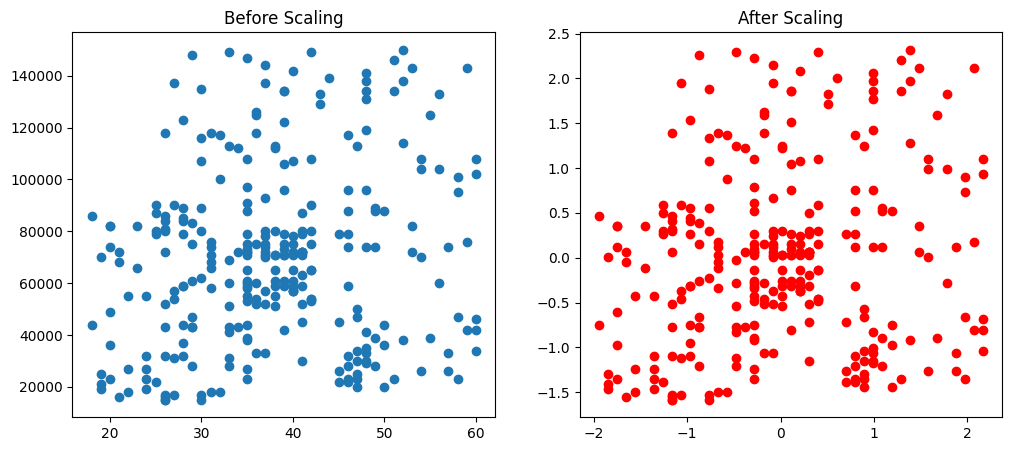

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plotting before scaling
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

# Plotting after scaling
ax2.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color='red')  # Assuming 'Age' and 'EstimatedSalary' are the first two columns after scaling
ax2.set_title("After Scaling")

plt.show()

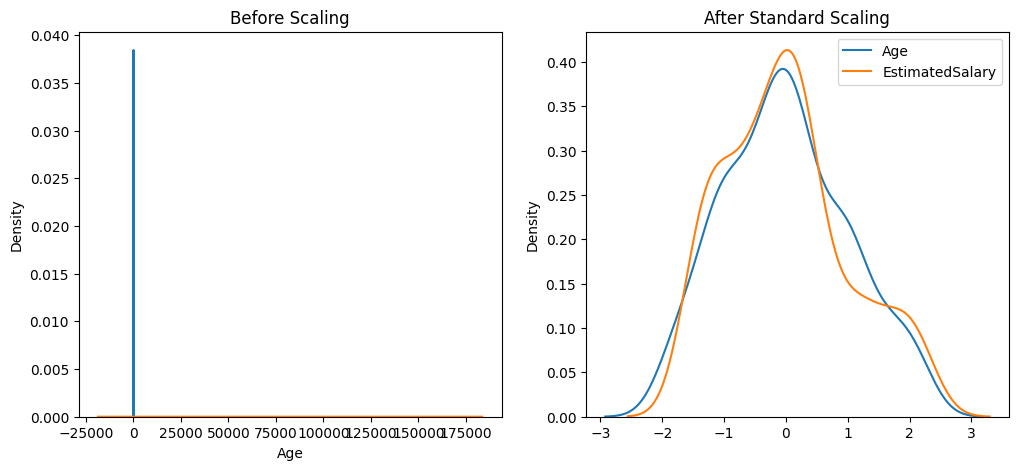

In [29]:
# Creating the subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled[:, 0], ax=ax2, label='Age')  # Assuming 'Age' is the first column after scaling
sns.kdeplot(X_train_scaled[:, 1], ax=ax2, label='EstimatedSalary')  # Assuming 'EstimatedSalary' is the second column after scaling
plt.legend()
plt.show()